In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs, make_circles,fetch_20newsgroups,make_classification

from sklearn.pipeline import make_pipeline

from sklearn import *
from sklearn.model_selection import *

from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay,silhouette_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, AdaBoostClassifier

# Feladatok:

## 1. Olvasd be az adathalmazt: diabetes.csv

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180,32.9,0.171,63,0
764,2,122.0,70,27,0,36.8,0.340,27,0
765,5,121.0,72,23,112,26.2,0.245,30,0
766,1,126.0,60,0,0,30.1,0.349,47,1


## 2. Előfeldolgozás (1.5 pont)
- Szűrd ki azokat a sorokat az adathalmazból, ahol a testtömegindex (BMI) és a vérnyomás (BloodPressure) értéke 0. (0.5 pont)

In [3]:
# - Szűrd ki azokat a sorokat az adathalmazból, ahol a testtömegindex (BMI) és a vérnyomás (BloodPressure) értéke 0. (0.5 pont)
diabetes = diabetes[(diabetes.BMI != 0) & (diabetes.BloodPressure != 0)]
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180,32.9,0.171,63,0
764,2,122.0,70,27,0,36.8,0.340,27,0
765,5,121.0,72,23,112,26.2,0.245,30,0
766,1,126.0,60,0,0,30.1,0.349,47,1


- A hiányzó értékeket helyettesítsd az adott oszlop átlagával, de az átlagszámításkor csak azokat a sorokat vedd figyelembe, ahol az életkor megegyezik a hiányzó értékhez tartozó páciens életkorával. (0.5 pont)

In [4]:
#- A hiányzó értékeket helyettesítsd az adott oszlop átlagával, de az átlagszámításkor csak azokat a sorokat vedd figyelembe, ahol az életkor megegyezik a hiányzó értékhez tartozó páciens életkorával. (0.5 pont)
diabetes['BMI'].fillna(diabetes.groupby('Age')['BMI'].transform('mean'), inplace=True)
diabetes['BloodPressure'].fillna(diabetes.groupby('Age')['BloodPressure'].transform('mean'), inplace=True)
diabetes

/tmp/ipykernel_90569/3047774974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes['BMI'].fillna(diabetes.groupby('Age')['BMI'].transform('mean'), inplace=True)
/tmp/ipykernel_90569/3047774974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes['BloodPressure'].fillna(diabetes.groupby('Age')['BloodPressure'].transform('mean'), inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180,32.9,0.171,63,0
764,2,122.0,70,27,0,36.8,0.340,27,0
765,5,121.0,72,23,112,26.2,0.245,30,0
766,1,126.0,60,0,0,30.1,0.349,47,1


- Készíts egy új oszlopot "eletszakasz" néven, amely az életkor alapján vesz fel értékeket. A következő értékek fordulhatnak elő: Fiatalkorú (0-18 évig), Fiatal felnőtt (18-29), Középkorú (29-59), Időskorú (59-100). (0.5 pont)

In [5]:
#- Készíts egy új oszlopot "eletszakasz" néven, amely az életkor alapján vesz fel értékeket. A következő értékek fordulhatnak elő: Fiatalkorú (0-18 évig), Fiatal felnőtt (18-29), Középkorú (29-59), Időskorú (59-100). (0.5 pont)
diabetes['eletszakasz'] = pd.cut(diabetes['Age'], bins=[0, 18, 29, 59, 100], labels=['Fiatalkorú', 'Fiatal felnőtt', 'Középkorú', 'Időskorú'])
diabetes

/tmp/ipykernel_90569/2012927525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes['eletszakasz'] = pd.cut(diabetes['Age'], bins=[0, 18, 29, 59, 100], labels=['Fiatalkorú', 'Fiatal felnőtt', 'Középkorú', 'Időskorú'])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,eletszakasz
0,6,148.0,72,35,0,33.6,0.627,50,1,Középkorú
1,1,85.0,66,29,0,26.6,0.351,31,0,Középkorú
2,8,183.0,64,0,0,23.3,0.672,32,1,Középkorú
3,1,89.0,66,23,94,28.1,0.167,21,0,Fiatal felnőtt
4,0,137.0,40,35,168,43.1,2.288,33,1,Középkorú
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180,32.9,0.171,63,0,Időskorú
764,2,122.0,70,27,0,36.8,0.340,27,0,Fiatal felnőtt
765,5,121.0,72,23,112,26.2,0.245,30,0,Középkorú
766,1,126.0,60,0,0,30.1,0.349,47,1,Középkorú


## 3. Vizualizáció (1.5 pont)
- Készíts scatter plotot a BMI és a DiabetesPedigreeFunction oszlopok alapján. A pontok színei jelezzék, hogy az adott páciens cukorbeteg-e vagy sem. (0.5 pont)

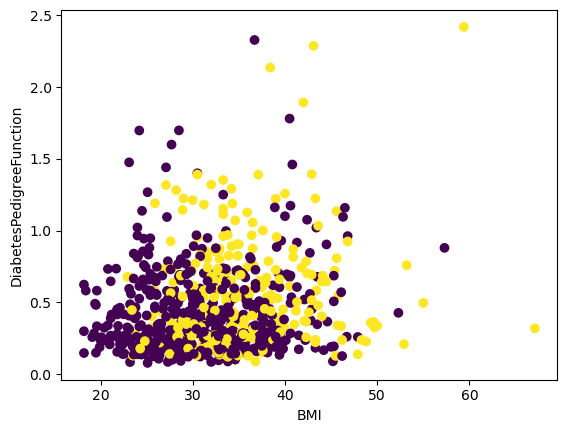

In [6]:
#- Készíts scatter plotot a BMI és a DiabetesPedigreeFunction oszlopok alapján. A pontok színei jelezzék, hogy az adott páciens cukorbeteg-e vagy sem. (0.5 pont)
plt.scatter(diabetes['BMI'], diabetes['DiabetesPedigreeFunction'], c=diabetes['Outcome'])
plt.xlabel('BMI')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()

- Készíts ábrát, amely oszlopok segítségével megmutatja, hogy életszakaszonként mekkora az átlagos SkinThickness, BMI és BloodPressure. Milyen következtetést lehet levonni az ábrából? (1 pont)

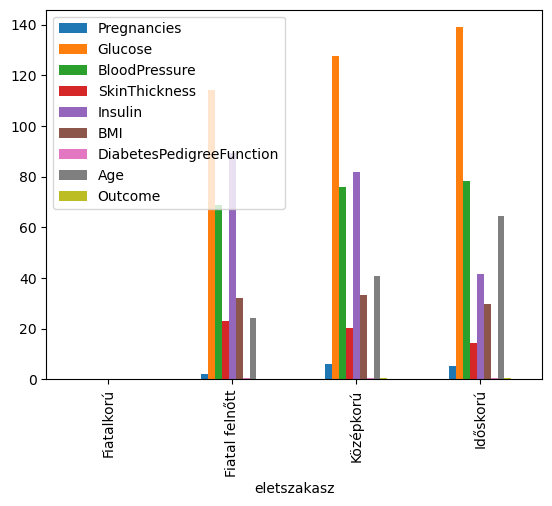

Következtetések: A fiatalkorúakra (0-18) nincsenek adatok, ahogy idősödnek az emberek, egyre nagyobb a vércukorszint, magasabb a vérnyomás és egyre csökken a bőr vastagsága, az inzulin szintje is csökken, illetve a testtömegindex is. Fontos még megjegyezni, hogy leginkább a középkorúak szülnek, de ez látszólag nem befolyásolja az értékeket.


In [7]:
#- Készíts ábrát, amely oszlopok segítségével megmutatja, hogy életszakaszonként mekkora az átlagos SkinThickness, BMI és BloodPressure. Milyen következtetést lehet levonni az ábrából? (1 pont)
diabetes.groupby('eletszakasz').mean().plot.bar()
plt.show()
print("Következtetések: A fiatalkorúakra (0-18) nincsenek adatok, ahogy idősödnek az emberek, egyre nagyobb a vércukorszint, magasabb a vérnyomás és egyre csökken a bőr vastagsága, az inzulin szintje is csökken, illetve a testtömegindex is. Fontos még megjegyezni, hogy leginkább a középkorúak szülnek, de ez látszólag nem befolyásolja az értékeket.")

## 4. Modell készítés (4 pont)

- Az Outcome attribútum lesz az osztálycímkénk. 
- Válassz ki tetszőlegesen 4 attribútumot, amelyekről úgy gondolod, hogy hatással van az osztálycímkére. Ezt a 4 attribútumot használd a modell tanítása során.
- BaggingClassifier osztályozó modelleket kell készítened, amely döntési fákból épül fel.
- Vizsgáld meg a modell pontosságát (accuracy) különböző paraméter beállításoknál: különböző maximális fa mélységeknél (1-től 10-ig) és különböző fa számosságnál (1-től 17-ig páratlan számok). Összesen 10 x 9 = 90 modell pontosságát kell kiszámolnod. A pontosságot 10-fold cross validation-nel határozd meg. (2 pont)
- Jelenítsd meg a pontosságokat egy ábrával. Az ábra horizontális tengelyén a maximális fa mélységek, a vertikális tengelyén a fa számosságok legyenek, az ábrán 90 pont szerepeljen. A pontok mérete legyen s=100. A pontok színét a pontosság mértéke határozza meg. Szerepeljen az ábrán colorbar, amely megmondja, hogy a színek milyen értékeket jelölnek. (2 pont)


In [8]:
#4. Modell készítés (4 pont)

#- Az Outcome attribútum lesz az osztálycímkénk. 
label = 'Outcome'

#- Válassz ki tetszőlegesen 4 attribútumot, amelyekről úgy gondolod, hogy hatással van az osztálycímkére. Ezt a 4 attribútumot használd a modell tanítása során.
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']

feat_data = diabetes[features].copy()
label_data = diabetes[label].copy()
feat_data

#- BaggingClassifier osztályozó modelleket kell készítened, amely döntési fákból épül fel.
clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
clf.fit(feat_data, label_data)
clf

#- Vizsgáld meg a modell pontosságát (accuracy) különböző paraméter beállításoknál: különböző maximális fa mélységeknél (1-től 10-ig) és különböző fa számosságnál (1-től 17-ig páratlan számok). Összesen 10 x 9 = 90 modell pontosságát kell kiszámolnod. A pontosságot 10-fold cross validation-nel határozd meg. (2 pont)
max_depths = range(1, 11)
n_estimators = range(1, 18, 2)
scores = []
for max_depth in max_depths:
    temp_scores = []
    for n_estimator in n_estimators:
        clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=max_depth), n_estimators=n_estimator, random_state=42)
        score = cross_val_score(clf, feat_data, label_data, cv=10, scoring='accuracy').mean()
        temp_scores.append(score)
    scores.append(temp_scores)



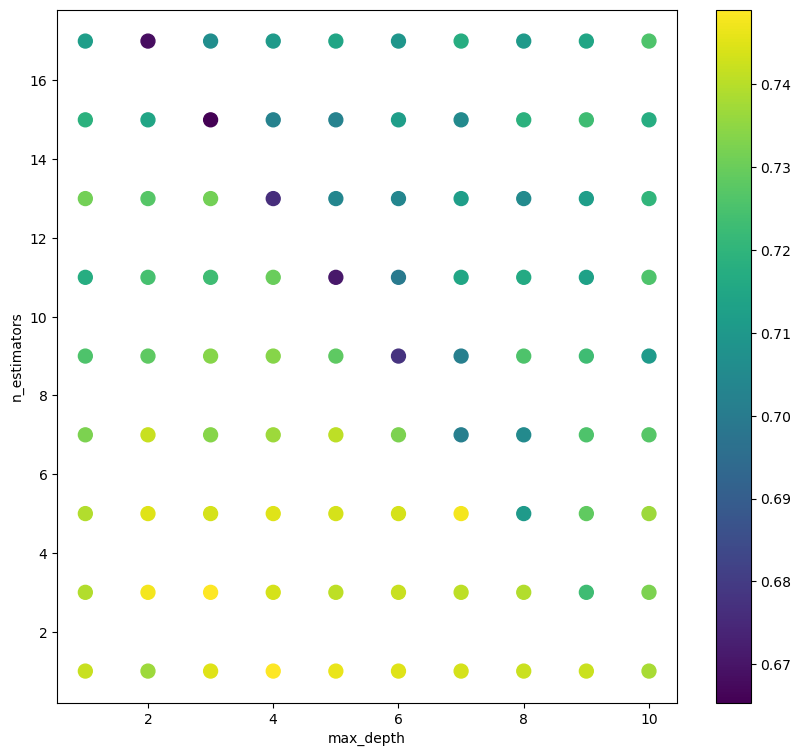

In [9]:
#- Jelenítsd meg a pontosságokat egy ábrával. Az ábra horizontális tengelyén a maximális fa mélységek, a vertikális tengelyén a fa számosságok legyenek, az ábrán 90 pont szerepeljen. A pontok mérete legyen s=100. A pontok színét a pontosság mértéke határozza meg. Szerepeljen az ábrán colorbar, amely megmondja, hogy a színek milyen értékeket jelölnek. (2 pont)
xx, yy = np.meshgrid(max_depths, n_estimators)
plt.figure(figsize=(10, 9))
plt.scatter(xx, yy, s=100, c=scores)
plt.colorbar()
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.show()

## 5. Osztályozás (1 pont)
- Válaszd ki azokat a paramétereket (maximális fa mélység és fa számosság), amellyel a legjobb pontosságot sikerült elérni. Készís egy modellt ezekkel a praméterekkel és tanítsd az összes bemeneti adat felhasználásával. (0.5 pont)

In [10]:
#- Válaszd ki azokat a paramétereket (maximális fa mélység és fa számosság), amellyel a legjobb pontosságot sikerült elérni. Készís egy modellt ezekkel a praméterekkel és tanítsd az összes bemeneti adat felhasználásával. (0.5 pont)
best_max_depth = 3
best_tree_count = 2
clf2 = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=best_max_depth), n_estimators=best_tree_count, random_state=42)
features2 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
feat_data2 = diabetes[features2].copy()
label_data2 = diabetes[label].copy()
clf2.fit(feat_data2, label_data2)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=2,
                  random_state=42)

- Készíts egy új rekordot, amelyben minden attribútumot megadsz, amelyek a modell tanításánál is felhasználásra kerültek. Próbálj meg az általad ismert értékeket a saját adataiddal kitölteni (pl. életkor). A modell segítségével végezz predikciót erre a rekordra. Írd le, hogy milyen osztálycímkét ad vissza a modell. (0.5 pont)

In [11]:
#- Készíts egy új rekordot, amelyben minden attribútumot megadsz, amelyek a modell tanításánál is felhasználásra kerültek. Próbálj meg az általad ismert értékeket a saját adataiddal kitölteni (pl. életkor). A modell segítségével végezz predikciót erre a rekordra. Írd le, hogy milyen osztálycímkét ad vissza a modell. (0.5 pont)